<center><p float="center">
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>                                                                         <center><h1></h1></center>
<h1><left> <font size=5>Project 1 - Financial News Reporting System</font></left></h1>

# **Business Overview**

The financial services sector operates in a high-stakes, data-driven environment where access to accurate, real-time market intelligence is critical for informed investment decisions, risk mitigation, and competitive advantage.

Today's financial news ecosystem extends well beyond traditional written reports—encompassing earnings call recordings, analyst briefings, visual data such as technical charts, and live commentary across digital platforms.

With this expansion in data sources and modalities, financial institutions face increasing difficulty in consolidating and interpreting large volumes of diverse information quickly and accurately.

The inability to process and act on this intelligence in real-time can result in missed opportunities, increased exposure to market risks, and inefficiencies in decision-making workflows.


# **Challenge**


Organizations struggle to efficiently process heterogeneous financial news data—including articles, audio recordings, and charts—in real-time.

Traditional analysis methods cannot handle the volume and variety of information while maintaining speed and accuracy needed for timely market insights.

Financial professionals currently face three critical obstacles:
1. **Information Overload**: The exponential growth of financial content—ranging from text-based articles and podcasts to complex visual data—has made manual monitoring infeasible. Investment teams are often overwhelmed by the sheer volume of daily updates, limiting their ability to capture relevant insights promptly.

2. **Data Heterogeneity**: Market intelligence arrives in multiple, unstructured formats—written news, audio commentaries, and data visualizations—each requiring specialized processing techniques. Traditional analytical systems are not designed to handle these multimodal inputs cohesively, resulting in fragmented insights and process inefficiencies.

3. **Speed and Responsiveness**: Timeliness is a crucial factor in financial analysis. Manual or semi-automated workflows often introduce significant delays, causing analysts to act on outdated information. This lag diminishes the strategic and operational value of insights.

Manual monitoring and analysis of these diverse information streams creates bottlenecks in decision-making processes, increases operational costs, and risks missing critical market-moving events.

Organizations, therefore, need intelligent automation systems that can process multimodal financial data at scale while maintaining the accuracy and contextual understanding required for high-stakes investment decisions.


#  **Objective**

The objective is to develop a production-grade Financial News Intelligence System that leverages Large Language Models (LLMs) and multimodal AI to automate the end-to-end ingestion, analysis, and classification of financial news and market data.

This system will:
- Aggregate and process multimodal data sources—including text articles, audio recordings etc.
- Convert non-textual inputs such as audio into structured textual insights using speech-to-text models.
- Perform classification and extractions of key entities from the news content such as:
    - Market Sentiment: Positive, Negative, or Neutral
    - Market Sector such as Technology, Healthcare, Energy
    - Market Impact Level: High, Medium, or Low

By introducing intelligent automation and scalable classification, the solution aims to enable faster, data-driven decision-making, improve operational efficiency, and enhance transparency for compliance and risk management stakeholders.

**Expected Business Impact:**

- **Reduced Analysis Time:** Accelerates the process of insight generation from hours to almost real-time.
- **Improved Accuracy and Consistency:** Minimizes subjective bias in interpreting financial data.
- **Scalable Intelligence:** Allows seamless expansion across multiple financial instruments, markets, and data types.
- **Enhanced Decision Confidence:** Ensures that investment and risk teams have access to validated, high-quality insights for critical market actions


# Overview of System Architecture

The Financial News Intelligence System is designed using a modular, three-layer architecture that enables scalable, accurate, and real-time processing of multimodal financial data. Each layer plays a distinct role — from data ingestion to intelligent analysis and reporting — ensuring seamless integration and traceability across the pipeline.



**1. Data Ingestion Layer:**
The system ingests two types of inputs — text-based articles and audio recordings.

- Articles: Textual financial news directly enters the pipeline for analysis.

- Audio: Audio data is processed separately using the Whisper Model, which converts spoken content into text through speech-to-text transcription.

**2. Processing Layer:**
Once both text and transcribed audio are available, they are passed into the LLM (gpt-5-mini) for further processing.
The LLM performs two core tasks:

**Extraction/Classification**: Determines key analytical attributes of the news, such as:
- Sentiment — Identifies if the tone is Positive, Negative, or Neutral.
- Sector — Classifies the news under a market sector (e.g., Energy, Technology, Finance).
- Impact Level — Assesses the potential effect on the market (Low, Medium, or High).

**Summarization**: Generates a concise summary and a title for each article.

**3. Report Generation Layer:** The extracted information — sentiment, sector, impact level, and summary — is combined to generate a comprehensive financial report.

This report serves as a structured, human-readable output that highlights market sentiment, sector trends, and potential impacts derived from multiple news sources.

The flowchart below demonstrates the overall system architecture

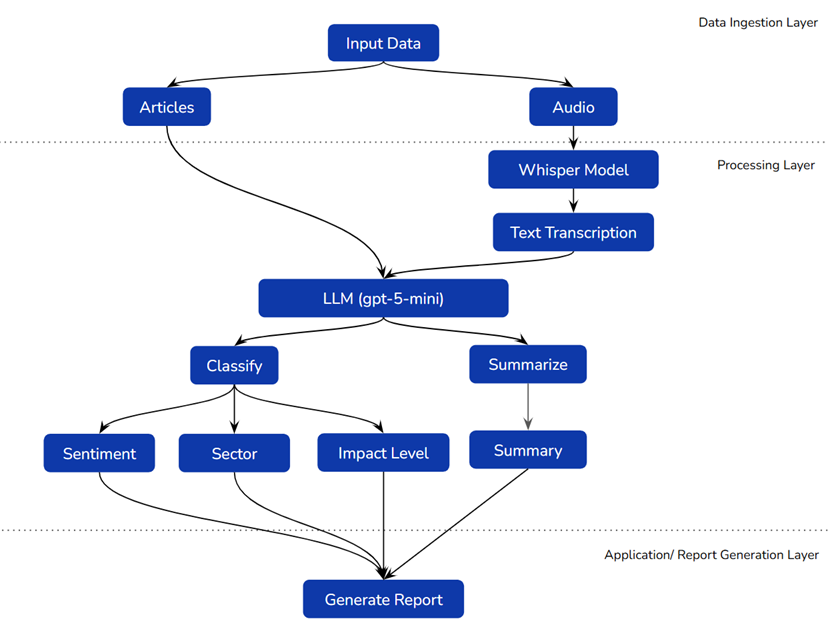

# **Setup**

Package Installation

In [1]:
!pip install -q openai==1.66.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.4/567.4 kB 7.8 MB/s eta 0:00:00


Importing the required packages

In [2]:
import os
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path
from typing import List, Dict, Any
from openai import AzureOpenAI
from google.colab import userdata

## **Model Deployment & Authentication (3 Marks)**

### Authentication for Azure OpenAI models

Navigate to 'Models + endpoints' to access the authentication details of the deployed model (gpt-5-mini in this case).

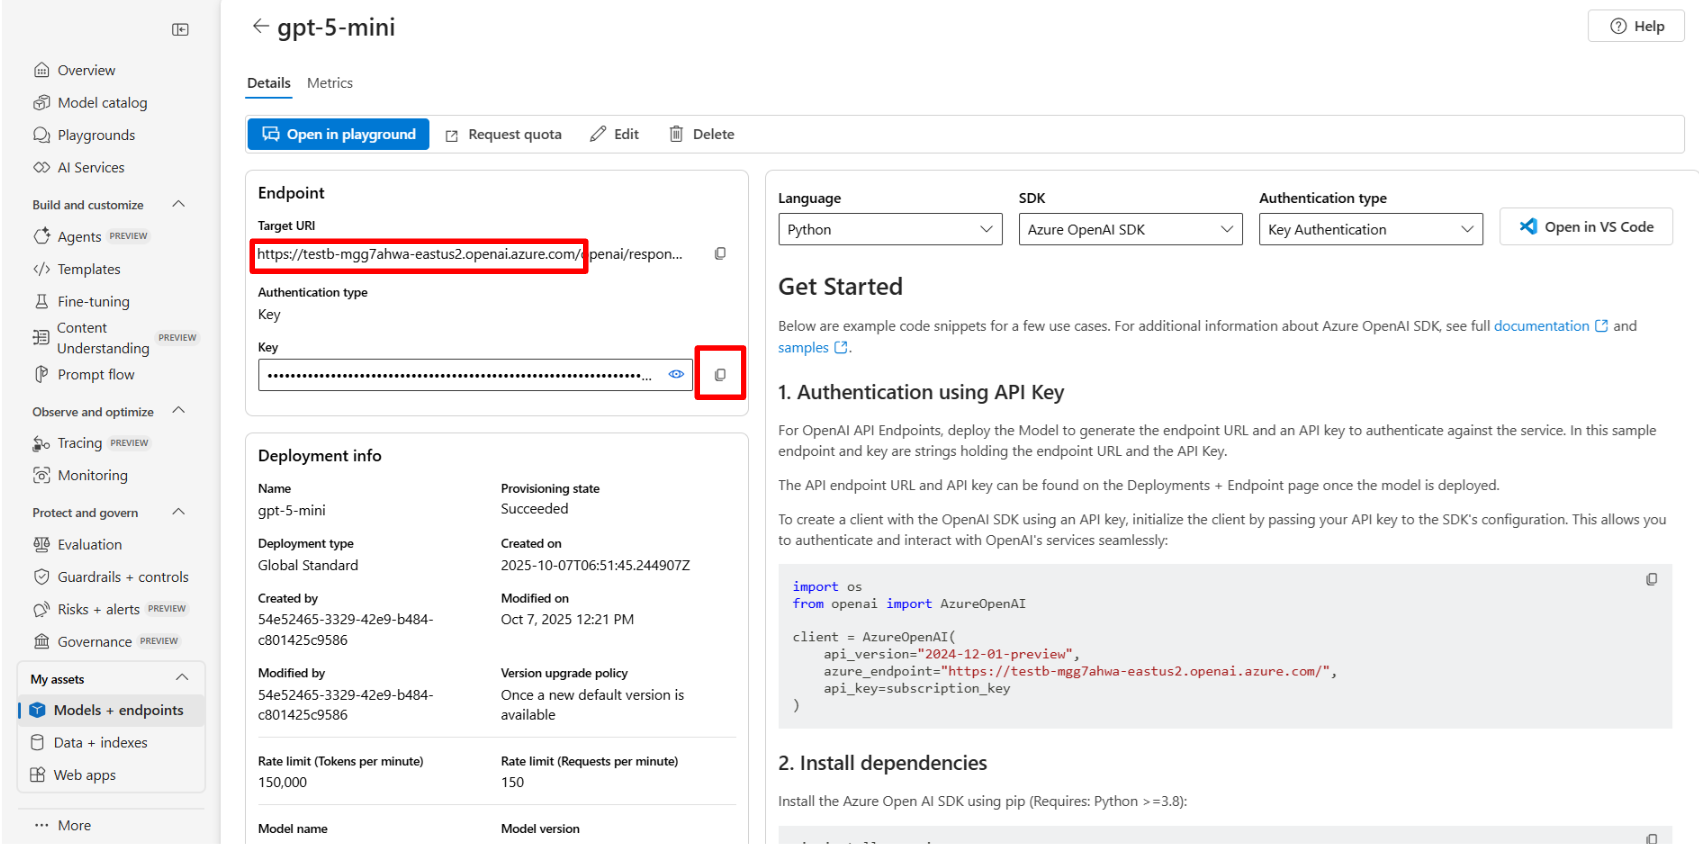

**NOTE**: Ensure that you're using the Target URI till `.com`.

For instance, based on the above image, the Endpoint URL will be of the  format: `https://testb-mgggt9b4-eastus2.openai.azure.com`

In order to be abe to authenticate our identity and programmatically access the Azure Open AI API from Google Colab, we need to read our credentials into the Colab environment in a secure way using Colab secrets.

In [7]:
# Initialize the OpenAI Model Variables such as API Key, Endpoint URL and the API Version
azure_api_key = userdata.get("AZURE_OPENAI_API_KEY")
azure_endpoint_url = userdata.get("AZURE_OPENAI_BASE_URL")
azure_api_version = '2025-04-01-preview'

In [4]:
# Instantiate gpt-5-mini Model


In [8]:
# Create an instance of the AzureOpenAI client to connect to Azure OpenAI services
# Define the endpoint, api key, api version

client = AzureOpenAI(
    api_version = azure_api_version,
    azure_endpoint = azure_endpoint_url,
    api_key = azure_api_key,
)

model_name = 'gpt-5-mini'

### Authentication for Whisper Models

We'll utilize the Whisper Model on Azure on convert the audio recordings to text transcriptions.

Once the `whisper` model is deployed via the Model Catalog in Azure AI Foundry, copy the Target URI and the Key from the Dashboard as shown below.

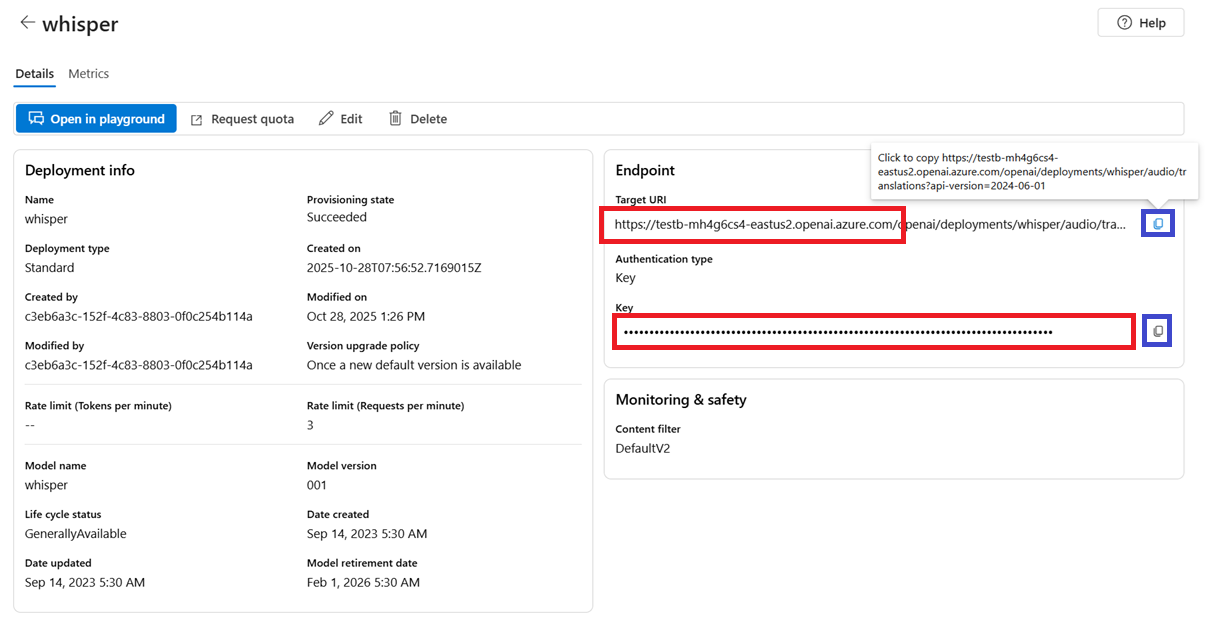

The **Key** section contains the API key for accessing the Whisper model, while the **Target URL** contains the details required for Model's Endpoint URL, the deployment name and its API version, as illustrated in the image below.

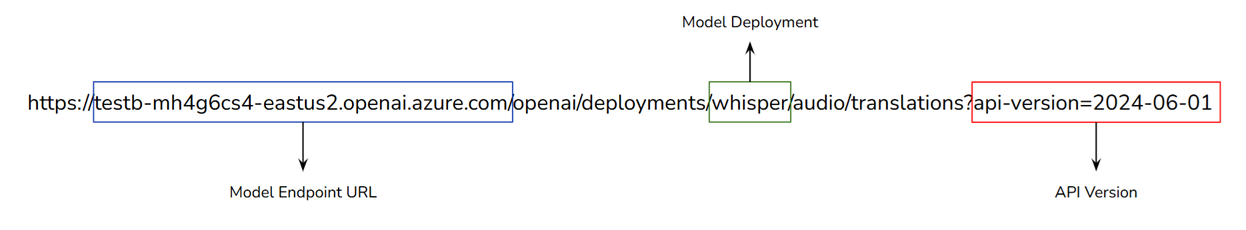


For instance, based on the above image,

- Endpoint URL is `https://testb-mh4g6cs4-eastus2.openai.azure.com`
- Model Deployment ID is `whisper`
- Model API Version is `2024-06-01`


In [10]:
# Initialize the Whisper Model variables such as API Key, Endpoint URL and the API Version
whisper_api_key = userdata.get("WHISPER_API_KEY")
whisper_endpoint_url = userdata.get("WHISPER_URL")
whisper_api_version = '2024-06-01'


The following code cell defines the client to access Whisper model. For more information, you may refer to the following [link](https://learn.microsoft.com/en-us/azure/ai-foundry/openai/whisper-quickstart?tabs=command-line%2Cpython-new%2Ckeyless%2Ctypescript-keyless&pivots=programming-language-python#:~:text=OpenAI%20Python%200.28.1-,Python,-Copy)

In [11]:
# Initialize the Azure OpenAI client to connect to the Whisper model service on Azure
# Define the Whisper API Key, API version, Endpoint URL

whisper_client = AzureOpenAI(
    api_version = whisper_api_version,
    azure_endpoint = whisper_endpoint_url,
    api_key = whisper_api_key,
)

model_name = 'whisper'

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Ingestion (3 Marks)**

In [13]:
from google.colab import files
uploaded = files.upload()

Saving data_code.zip to data_code.zip


The Data Ingestion Layer serves as the foundation of the system, responsible for ingesting the financial data from diverse sources.

In [14]:
# Write Linux command to unzip the contents of the data.zip folder
!unzip data_code.zip

Archive:  data_code.zip
   creating: data/
   creating: data/audio_files/
  inflating: data/audio_files/BusinessStandard_Experts split on impact of new US tariffs on India's jobs, exports.mp3  
  inflating: data/audio_files/Opec pops US shale’s balloon.mp3  
   creating: data/news_articles/
  inflating: data/news_articles/news_articles.csv  


In [15]:
# !ls is a Linux command that lists files and directories in the specified path
!ls data/

audio_files  news_articles


In [18]:
# Define the paths to the articles and audio folders for easy reference
articles_folder = "data/news_articles"
audio_folder = "data/audio_files"

Reading the CSV file using Pandas

In [21]:
# Read the news_articles.csv file form the specified folder path
df = pd.read_csv(f"{articles_folder}/news_articles.csv")

# Inspecting the data
df.head()

,Date,Path,Source,Content
0,2025-08-14,https://www.reuters.com/business/energy/oil-pr...,Reuters,Oil prices climbed about 2% to a one-week high...
1,2025-08-14,https://www.cnbc.com/2025/08/14/economist-sume...,CNBC,"Economist Marc Sumerlin, one of nearly a dozen..."
2,2025-08-14,https://www.cnbc.com/2025/08/14/ppi-inflation-...,CNBC,Wholesale prices rose far more than expected i...
3,2025-08-14,https://www.cnbc.com/2025/08/14/potential-fed-...,CNBC,Wall Street veteran David Zervos added his nam...
4,2025-08-14,https://www.cnbc.com/2025/08/14/gpt-5-openai-a...,CNBC,Sam Altman turned OpenAI into a cultural pheno...


In [ ]:
# Let's store the value of Date for the Report generation stage
report_date = df.iloc[0]['Date']

# **Processing Layer (24 Marks)**

The Processing Layer forms the core layer of the system.

It leverages Large Language Models (LLMs) and multimodal LLMs to process and extract insights from the inputs data sources.

## Processing Audio Files (4 Marks)

The following function converts the audio recordings to text transcription using the Whisper model.

Define the function to transcribe the contents of the audio file using the Whisper model. Refer to the following [link](https://learn.microsoft.com/en-us/azure/ai-foundry/openai/whisper-quickstart?tabs=command-line%2Cpython-new%2Ckeyless%2Ctypescript-keyless&pivots=programming-language-python#:~:text=OpenAI%20Python%200.28.1-,Python,-Copy) for more information

In [36]:
# The following function transcribes the audio file using the Whisper model on Azure OpenAI
# Define the arguments for the whisper client such as the model name and file name

def get_transcription(file):

    # Send a transcription request to the Azure OpenAI Whisper model
    transcript = whisper_client.audio.transcriptions.create(
     model = model_name,
     file=file
    )

    # Return only the transcribed text from the response
    return transcript.text

The following functions loops over the audio folder and generates transcriptions.

In [37]:
def process_folder(folder_path):
    """
    Loop through all audio files in a folder and transcribe them using the Whisper model.

    Args:
        folder_path: Path to the folder containing audio files

    Returns:
        A pandas DataFrame containing metadata and transcriptions of all processed audio files.
    """

    # Convert the input folder path to a Path object
    folder = Path(audio_folder)

    # Initialize n empty list to hold records (each record will be one file’s transcription info)
    records = []

    # Define allowed audio file extensions
    audio_extensions = ['.mp3', '.wav', '.m4a', '.flac', '.ogg', '.aac']

    # Iterate through every file in the given folder
    for file_path in folder.iterdir():
        report_date = pd.to_datetime(df['Date']).dt.date.iloc[0]
        # Process only files (not subfolders) that have a supported audio extension
        if file_path.is_file() and file_path.suffix.lower() in audio_extensions:
            print(f"Processing: {file_path.name}")  # Show which file is being processed

            try:
                # Transcribe the current audio file
                transcription = get_transcription(open(file_path, "rb"))

                # Add and append the transcription content and its metadata to the records list
                 #report_date, file_path.name,

                records.append({
                    'Date': report_date,                 # Date of report (assumed to be defined globally)
                    'Path': str(file_path),                 # File name of the audio file
                    'Source': 'Audio',            # Label indicating this is an audio source
                    'Content': transcription               # Transcribed text from the audio
                })

                print(f"Processed: {file_path.name}")  # Indicate success

            except Exception as e:
                # Handle any errors during transcription
                print(f"Error processing {file_path.name}: {e}")

                # Append the records in the output, but mark 'content' as None
                records.append({
                  "Date": report_date,
                  "Path": str(file_path),
                  "Source": "Audio",
                  "Content": None
                                })

    # Convert the collected records into a pandas DataFrame for easy analysis
    new_df = pd.DataFrame(records)

    # Return the final DataFrame
    return new_df

In [38]:
# Process the audio files present in the audio folder
audio_df = process_folder(audio_folder)

# Display the DataFrame
audio_df

Processing: BusinessStandard_Experts split on impact of new US tariffs on India's jobs, exports.mp3
Processed: BusinessStandard_Experts split on impact of new US tariffs on India's jobs, exports.mp3
Processing: Opec pops US shale’s balloon.mp3
Processed: Opec pops US shale’s balloon.mp3


,Date,Path,Source,Content
0,2025-08-14,data/audio_files/BusinessStandard_Experts spli...,Audio,The steep tariff imposed on Indian exports to ...
1,2025-08-14,data/audio_files/Opec pops US shale’s balloon.mp3,Audio,Good morning from the Financial Times. Today i...


The following code appends the results of the transcription back to the original dataset.

In [39]:
# Combine the two DataFrames: one containing text articles and another containing audio transcriptions
final_df = pd.concat([df, audio_df], ignore_index=True)

# Display the combined DataFrame to verify the merged result
final_df

,Date,Path,Source,Content
0,2025-08-14,https://www.reuters.com/business/energy/oil-pr...,Reuters,Oil prices climbed about 2% to a one-week high...
1,2025-08-14,https://www.cnbc.com/2025/08/14/economist-sume...,CNBC,"Economist Marc Sumerlin, one of nearly a dozen..."
2,2025-08-14,https://www.cnbc.com/2025/08/14/ppi-inflation-...,CNBC,Wholesale prices rose far more than expected i...
3,2025-08-14,https://www.cnbc.com/2025/08/14/potential-fed-...,CNBC,Wall Street veteran David Zervos added his nam...
4,2025-08-14,https://www.cnbc.com/2025/08/14/gpt-5-openai-a...,CNBC,Sam Altman turned OpenAI into a cultural pheno...
5,2025-08-14,https://www.cnbc.com/2025/08/14/kodak-going-co...,CNBC,Clair Sapilewski has dozens of rolls of camera...
6,2025-08-14,https://www.cnbc.com/2025/08/14/tapestry-tpr-q...,CNBC,Shares of Coach and Kate Spade parent Tapestry...
7,2025-08-14,https://www.cnbc.com/2025/08/14/ulta-and-targe...,CNBC,Ulta Beauty and Target said Thursday that they...
8,2025-08-14,https://www.cnbc.com/2025/08/14/tariff-driven-...,CNBC,With both the producer price index and the con...
9,2025-08-14,https://www.cnbc.com/2025/08/14/sp-upgrades-in...,CNBC,Credit rating agency S&P Global upgraded India...


## Sentiment Analysis (4 Marks)

The following function performs financial sentiment analysis on a given article using OpenAI's Chat Completion API.

It leverages a Large Language Model (LLM) to determine whether the article expresses a Positive, Negative, or Neutral market sentiment and provides a corresponding confidence score.

In [40]:
# Analyze the Sentiment of the Financial Article

def extract_financial_sentiment(article_text):
    """
    Extract sentiment from a financial article using OpenAI's API.

    Args:
        article_text: The financial article text to analyze

    Returns:
         A string containing the sentiment analysis result (JSON formatted)

    """

    # --- Create a system prompt to define the model's role and task ---
    # The system prompt sets clear instructions for the model
    # Defines an appropriate role and system message prompt

    system_prompt = """
    You are a financial sentiment analysis expert. Analyze the provided financial article and return a JSON object with:
    - sentiment: positive, negative, or neutral
    - confidence: a score from 0 to 1
    - summary: brief explanation of the sentiment
    Format your response as valid JSON only.
    """

    # --- Send the request to the OpenAI model ---
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": system_prompt},  # System message mentioning the model's role and formatting rules
            {"role": "user", "content": article_text}     # User message
        ],
        model = "gpt-5-mini",                 # The model to use (you can replace this with your deployed Azure/OpenAI model)
        # response_format =  {"type": "json_object"},     # Optional Argument to ensure structured JSON output
        # reasoning_effort = "medium"       # Optional Argument for reasoning effort of the model
    )

    # --- Extract and parse the response ---
    # The model returns a structured message object
    result = response.choices[0].message.content

    #  --- Return the result ---
    return result

## Market Sector Extraction (4 Marks)

The analyze_sector() function identifies the primary market sector and related sub-sectors discussed in a financial article using an LLM-based classification approach.

It leverages gpt-5-mini model to interpret the article's context and extract structured insights about the relevant industries or sectors mentioned.

In [41]:
# Analyze the Market Sector from a financial article

def analyze_sector(article_text):
    """
    Analyze the market sector from a financial article.

    Args:
        article_text: The financial article text to analyze.

    Returns:
         A string containing the sector analysis result (JSON formatted) <Enter the Return vaule of the function>
    """

    # --- Define a system prompt to instruct the model on how to classify the article ---
    system_prompt = """
    You are a financial market sector analysis expert. Analyze the provided financial article and identify:
    - sector: the primary market sector mentioned (e.g., Technology, Finance, Energy, Healthcare, etc.)
    - subsector: the specific industry or subsector if applicable
    - confidence: a score from 0 to 1
    - reasoning: brief explanation of your classification
    Format your response as valid JSON only.
    """

    # --- Send the article text to the model with a clear instruction prompt ---
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": system_prompt},  # System message mentioning the model's role and formatting rules
            {"role": "user", "content": article_text}     # User message
        ],
        model = "gpt-5-mini",                # The model to use for sector analysis
        # response_format = {"type": "json_object"},    # Optional Argument to ensure structured JSON output
        # reasoning_effort = "medium"      # Optional Argument for reasoning effort of the model
    )

    # --- Extract the model's response content (JSON string) ---
    result = response.choices[0].message.content

    #  --- Return the result ---
    return result

## Impact Assessment (4 Marks)

The analyse_market_impact() function evaluates the market-level impact of a financial news article.
It determines whether the article's content is likely to have a Low, Medium, or High impact on the relevant market sector and explains the reasoning behind that classification.

This function leverages gpt-5-mini model to interpret the article's tone, subject matter, and financial implications, providing structured, explainable results in JSON format.

In [42]:
# Assess the Market Impact from the article - categorized as Low, Medium, or High

def analyse_market_impact(article_text: str) -> Dict[str, Any]:
    """
    Analyze the market impact from a financial article.

    Args:
        article_text: The financial article text to analyze.

    Returns:
         A dictionary containing the market impact analysis result (JSON parsed)

    """

    #  --- Define a system prompt to instruct the model on market impact evaluation and provide reasoning ---
    system_prompt = """
    You are a financial market impact analyst. Analyze the provided financial article and assess:
    - impact_level: Low, Medium, or High
    - affected_sectors: list of sectors potentially affected
    - market_outlook: positive, negative, or neutral
    - key_drivers: main factors driving the impact
    - confidence: score from 0 to 1
    - reasoning: detailed explanation of your assessment
    Format your response as valid JSON only.
    """

    #  --- Send the article and prompt to the model for analysis ---
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": system_prompt},  # System message mentioning the model's role and formatting rules
            {"role": "user", "content": article_text}     # User message
        ],
        model = "gpt-5-mini",                 # Model used for reasoning and text understanding
        # response_format =  {"type": "json_object"},     # Optional Argument to ensure structured JSON output
        # reasoning_effort = "high"     # Optional Argument for reasoning effort of the model
    )

    #  --- Extract the text content (JSON string) from the model's response ---
    result = response.choices[0].message.content

    #  --- Return the result ---
    return result

## Title and Summary Generator (4 Marks)

The article_summarizer() function uses gpt-5-mini model to generate a concise, professional summary of a financial article and create a relevant title that reflects the article’s main theme.

This helps transform long-form financial news into readable, high-value insights for analysts, investors, and automated reporting systems.

In [43]:
# Generate a concise summary and title for a financial article
def article_summarizer(article_text):
    """
    Summarize a financial article and generate an appropriate title.

    Args:
        article_text: The text content of the financial article to summarize.

    Returns:
         ____ <Enter the Return vaule of the function>

    """

    #  --- Define a system prompt to guide the model in producing a concise and structured summary and a summary title ---
    system_prompt = """
    You are a financial article summarizer. Analyze the provided financial article and generate:
    - title: a concise and engaging headline (max 10 words)
    - summary: a brief 2-3 sentence summary of the key points
    - key_takeaways: list of 3-5 main takeaways
    - relevance_score: 0-1 score for financial news relevance
    Format your response as valid JSON only.
    """

    #  --- Send the prompt and article text to the model for summarization ---
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": system_prompt},  # System message mentioning the model's role and formatting rules
            {"role": "user", "content": article_text}     # User message
        ],
        model = "gpt-5-mini",               # Model used for summarization
        # response_format = {"type": "json_object"},     # Optional Argument to ensure structured JSON output
        # reasoning_effort =  "low"      # Optional Argument for reasoning effort of the model
    )

    #  --- Extract the response from the model output ---
    result = response.choices[0].message.content

    #  --- Return the result ---
    return result

## Processing all the records (4 Marks)

The following function takes as input the dataframe, iterates through each row in the dataframe, applies the LLM-based fuctions to extract the sentiment, market impact, sector analysis and its summary and outputs a new dataframe as the result.

In [44]:
def process_financial_articles(final_df):
    """
    Process all financial articles in a DataFrame and extract:
    - Sentiment
    - Market Impact
    - Sector Analysis
    - Summary and Title

    Args:
        final_df: A pandas DataFrame containing columns ['Date', 'Path', 'Source', 'Content']

    Returns:
        A pandas DataFrame with extracted sentiment, market impact, sector analysis, and summary
    """

    results = []

    #  --- Iterate through each article row with progress bar ---
    for _, row in tqdm(final_df.iterrows(), total=len(final_df), desc="Processing Articles"):
        text = row["Content"]

        try:
            #  --- Perform all LLM-based analyses ---
            sentiment       = extract_financial_sentiment(text)
            market_impact   = analyse_market_impact(text)
            sector_analysis = analyze_sector(text)
            content_summary = article_summarizer(text)


            #  --- Append structured result ---
            results.append({
                "Date"    : row["Date"],
                "Path"    : row["Path"],
                "Source"  : row["Source"],
                "Content" : text,
                # Extract the setiment, sector, impact and summary details
                "Sentiment"       : sentiment,
                "Market_Impact"   : market_impact,
                "Sector_Analysis" : sector_analysis,
                "Summary"         : content_summary

            })

        except Exception as e:
            #  --- Handle any errors gracefully and log the issue ---
            print(f"Error processing {row['Path']}: {e}")
            results.append({
                "Date"    : row["Date"],
                "Path"    : row["Path"],
                "Source"  : row["Source"],
                "Content" : text,
                # Assign None value/ corresponding Error Message if the extraction of setiment, sector, impact, summary hasnt not occured
                "Sentiment"     : None,
                "Market_Impact" : None,
                "Sector_Analysis": None,
                "Summary"       : None

            })

    # Convert list of dictionaries into a DataFrame
    processed_df = pd.DataFrame(results)

    # Return the processed dataframe
    return processed_df

In [46]:
new_df = process_financial_articles(final_df)
new_df

Processing Articles: 100%|██████████| 15/15 [05:50<00:00, 23.35s/it]


,Date,Path,Source,Content,Sentiment,Market_Impact,Sector_Analysis,Summary
0,2025-08-14,https://www.reuters.com/business/energy/oil-pr...,Reuters,Oil prices climbed about 2% to a one-week high...,"{""sentiment"":""positive"",""confidence"":0.8,""summ...","{\n ""impact_level"": ""Medium"",\n ""affected_se...","{\n ""sector"": ""Energy"",\n ""subsector"": ""Oil ...","{\n ""title"": ""Oil Rises on Geopolitics and Fe..."
1,2025-08-14,https://www.cnbc.com/2025/08/14/economist-sume...,CNBC,"Economist Marc Sumerlin, one of nearly a dozen...","{""sentiment"":""positive"",""confidence"":0.8,""summ...","{\n ""impact_level"": ""Medium"",\n ""affected_se...","{\n ""sector"": ""Finance"",\n ""subsector"": ""Mon...","{\n ""title"": ""Sumerlin Eyes Fed Chair, Urges ..."
2,2025-08-14,https://www.cnbc.com/2025/08/14/ppi-inflation-...,CNBC,Wholesale prices rose far more than expected i...,"{\n ""sentiment"": ""negative"",\n ""confidence"":...","{\n ""impact_level"": ""Medium"",\n ""affected_se...","{\n ""sector"": ""Finance"",\n ""subsector"": ""Mac...","{\n ""title"": ""Wholesale Inflation Surges, Thr..."
3,2025-08-14,https://www.cnbc.com/2025/08/14/potential-fed-...,CNBC,Wall Street veteran David Zervos added his nam...,"{\n ""sentiment"": ""positive"",\n ""confidence"":...","{\n ""impact_level"": ""Medium"",\n ""affected_se...","{\n ""sector"": ""Finance"",\n ""subsector"": ""Fin...","{\n ""title"": ""Jefferies' David Zervos Urges I..."
4,2025-08-14,https://www.cnbc.com/2025/08/14/gpt-5-openai-a...,CNBC,Sam Altman turned OpenAI into a cultural pheno...,"{""sentiment"":""positive"",""confidence"":0.87,""sum...","{\n ""impact_level"": ""Medium"",\n ""affected_se...","{\n ""sector"": ""Technology"",\n ""subsector"": ""...","{""title"":""GPT-5 Pushes OpenAI into Enterprise ..."
5,2025-08-14,https://www.cnbc.com/2025/08/14/kodak-going-co...,CNBC,Clair Sapilewski has dozens of rolls of camera...,"{""sentiment"":""negative"",""confidence"":0.9,""summ...","{\n ""impact_level"": ""Low"",\n ""affected_secto...","{\n ""sector"": ""Consumer Discretionary"",\n ""s...","{\n ""title"": ""Kodak Faces Financial Strain Am..."
6,2025-08-14,https://www.cnbc.com/2025/08/14/tapestry-tpr-q...,CNBC,Shares of Coach and Kate Spade parent Tapestry...,"{""sentiment"":""negative"",""confidence"":0.88,""sum...","{\n ""impact_level"": ""Medium"",\n ""affected_se...","{\n ""sector"": ""Consumer Discretionary"",\n ""s...","{\n ""title"": ""Tapestry Stock Plunges After $1..."
7,2025-08-14,https://www.cnbc.com/2025/08/14/ulta-and-targe...,CNBC,Ulta Beauty and Target said Thursday that they...,"{\n ""sentiment"": ""negative"",\n ""confidence"":...","{\n ""impact_level"": ""Medium"",\n ""affected_se...","{\n ""sector"": ""Consumer Discretionary"",\n ""s...","{\n ""title"": ""Ulta, Target to End Shop-in-Sho..."
8,2025-08-14,https://www.cnbc.com/2025/08/14/tariff-driven-...,CNBC,With both the producer price index and the con...,"{\n ""sentiment"": ""negative"",\n ""confidence"":...","{\n ""impact_level"": ""Medium"",\n ""affected_se...","{\n ""sector"": ""Industrials"",\n ""subsector"": ...","{\n ""title"": ""Hidden Inflation in Warehouses ..."
9,2025-08-14,https://www.cnbc.com/2025/08/14/sp-upgrades-in...,CNBC,Credit rating agency S&P Global upgraded India...,"{""sentiment"":""positive"",""confidence"":0.92,""sum...","{\n ""impact_level"": ""Medium"",\n ""affected_se...","{\n ""sector"": ""Finance"",\n ""subsector"": ""Sov...","{\n ""title"": ""S&P Upgrades India Sovereign Ra..."


# **Report Generation Layer (8 Marks)**

The Application Layer translates processed intelligence into actionable, user-facing outputs for decision-makers.

It iterates through each record in the dataframe and creates a structured report.

In [47]:
# Function to generate the formatted report
def generate_financial_report(data_frame):

    report_lines = []

    report_lines.append("Financial News Intelligence") # Report Heading

    report_lines.append(f"Date: {data_frame['Date'].iloc[0]}") # Report Date

    report_lines.append("")  # Insert a blank line for readability

    # Loop through each record in the DataFrame
    for i, row in data_frame.iterrows():

        # Add the Summary title, Summary, Sentiment, Sector and Market Impact to the Report
        report_lines.append(f"Article {i+1}: {row['Summary']}")
        report_lines.append(f"  Sentiment: {row['Sentiment']}")
        report_lines.append(f"  Sector: {row['Sector_Analysis']}")
        report_lines.append(f"  Market Impact: {row['Market_Impact']}")
        report_lines.append("")


    # Join all lines into a single string
    report_text = "\n".join(report_lines)

    return report_text

In [48]:
# Generate and print the report
report = generate_financial_report(new_df)

# Print the report
print(report)


Financial News Intelligence
Date: 2025-08-14

Article 1: {
  "title": "Oil Rises on Geopolitics and Fed Cut Hopes",
  "summary": "Oil prices climbed about 2% to a one-week high after President Trump warned of \"severe consequences\" if talks with Russia over Ukraine fail, and on optimism that a likely U.S. interest rate cut next month could boost demand. Brent settled at $66.84 and WTI at $63.96, recovering from recent lows amid lingering uncertainty over sanctions, secondary tariffs and supply data.",
  "key_takeaways": [
    "Brent rose 1.8% to $66.84 and WTI rose 2.1% to $63.96, moving out of technically oversold territory.",
    "Geopolitical risk from U.S.-Russia talks and threats of sanctions or secondary tariffs on Russian crude added a bullish risk premium.",
    "Market expectations of a September U.S. rate cut supported demand outlook for oil.",
    "Recent bearish EIA and IEA inventory/supply data had pushed prices to multi-week lows earlier this week."
  ],
  "relevance_sco

In [49]:
# Save the generated report to a text file

with open('/content/financial_report.txt', 'w') as f:
    f.write(report)

print("Report saved to: /content/financial_report.txt")

Report saved to: /content/financial_report.txt


# **Key Takeaways  (2 marks)**


This part of the project helps you demonstrate your ability to think beyond code and explain how your solution creates real value in a business setting.

Describe in detail where and how the project benefits the given objective, its key takeaways, who would benefit, and why it matters.

In [51]:
"""
Project Benefits & Objective:
This Financial News Sentiment Analysis project creates a comprehensive
intelligence system that automates the extraction of actionable insights
from financial news articles and audio transcriptions.

Where & How It Benefits:
Financial Decision-Making
Provides real-time sentiment analysis of market news for investment decisions
Identifies market impact levels (Low, Medium, High) to assess trading opportunities
Categorizes news by sector & subsector for targeted portfolio management

Risk Management & Compliance
Automated market sentiment tracking reduces manual analysis time
Generates structured reports for audit trails and compliance documentation
Captures both text articles and audio transcriptions, ensuring no data is missed
Data Pipeline Integration
Processes combined data sources (CSV articles + audio files)
Outputs JSON-formatted analysis for seamless database integration (perfect for your PostgreSQL ECL models)
Enables batch processing for month-to-month data volume increases

Key Takeaways:
Sentiment Intelligence - Transforms unstructured financial news into structured JSON data with confidence scores
Multi-Modal Processing - Handles both text articles and audio transcriptions using LLM-based Whisper model
Sector & Impact Analysis - Automatically categorizes market impact and affected sectors
Scalable Architecture - Uses API-based approach (no local GPU needed) for cost-effective scaling
Actionable Reports - Generates formatted intelligence reports for stakeholders

Who Would Benefit:
NBFCs & Financial Institutions (like your organization) - For ECL modeling and credit risk assessment
Portfolio Managers - For market sentiment tracking and investment decisions
Risk Analysts - For market impact assessment and sector-specific exposure
Compliance Teams - For audit trails and regulatory reporting
Trading Desks - For real-time market intelligence

Why It Matters:
Automation - Reduces manual analysis from hours to minutes
Scalability - Handles growing data volumes (month-to-month increases)
Accuracy - Uses GPT-4 models for consistent, high-quality analysis
Integration - Outputs JSON for direct PostgreSQL/Snowflake database loading
Real-Time Intelligence - Enables faster decision-making for financial operations
Cost-Effective - API-based approach without expensive GPU infrastructure


"""

'\nProject Benefits & Objective:\nThis Financial News Sentiment Analysis project creates a comprehensive \nintelligence system that automates the extraction of actionable insights \nfrom financial news articles and audio transcriptions.\n\nWhere & How It Benefits:\nFinancial Decision-Making\nProvides real-time sentiment analysis of market news for investment decisions\nIdentifies market impact levels (Low, Medium, High) to assess trading opportunities\nCategorizes news by sector & subsector for targeted portfolio management\n\nRisk Management & Compliance\nAutomated market sentiment tracking reduces manual analysis time\nGenerates structured reports for audit trails and compliance documentation\nCaptures both text articles and audio transcriptions, ensuring no data is missed\nData Pipeline Integration\nProcesses combined data sources (CSV articles + audio files)\nOutputs JSON-formatted analysis for seamless database integration (perfect for your PostgreSQL ECL models)\nEnables batch pr